In [66]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [49]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\car_evaluation.csv')
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [50]:
enc = LabelEncoder()
df_num_cat = pd.DataFrame()

df_num_cat['buying'] = enc.fit_transform(df['buying'])
df_num_cat['maint'] = enc.fit_transform(df['maint'])
df_num_cat['doors'] = enc.fit_transform(df['doors'])
df_num_cat['persons'] = enc.fit_transform(df['persons'])
df_num_cat['lug_boot'] = enc.fit_transform(df['lug_boot'])
df_num_cat['safety'] = enc.fit_transform(df['safety'])
df_num_cat['class'] = enc.fit_transform(df['class'])

df_num_cat

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [53]:
X = df_num_cat.drop(['class'],axis=1)
y = df_num_cat['class']
print(X)
print(y)

      buying  maint  doors  persons  lug_boot  safety
0          3      3      0        0         2       1
1          3      3      0        0         2       2
2          3      3      0        0         2       0
3          3      3      0        0         1       1
4          3      3      0        0         1       2
...      ...    ...    ...      ...       ...     ...
1723       1      1      3        2         1       2
1724       1      1      3        2         1       0
1725       1      1      3        2         0       1
1726       1      1      3        2         0       2
1727       1      1      3        2         0       0

[1728 rows x 6 columns]
0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: class, Length: 1728, dtype: int32


In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33)

In [55]:
X_train.shape,X_test.shape

((1157, 6), (571, 6))

In [68]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [69]:
y_pred = clf_en.predict(X_test)
print(y_pred)

[2 2 2 0 0 2 0 2 0 2 0 2 0 0 2 0 0 2 0 2 0 2 0 2 0 2 2 2 2 2 2 0 0 2 2 2 2
 0 0 2 2 2 0 0 0 2 2 0 2 2 0 0 2 0 0 2 0 0 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 0
 0 2 0 2 0 2 2 0 0 0 0 0 2 2 2 2 2 2 2 2 0 2 0 2 2 2 0 2 2 2 2 0 0 2 0 2 2
 0 0 2 2 2 2 2 2 2 0 0 0 2 2 0 0 0 2 0 0 2 0 2 2 0 2 0 2 0 2 2 0 0 0 2 2 2
 2 0 2 2 2 2 0 2 2 2 0 0 2 0 0 2 0 2 0 0 2 0 2 2 2 0 2 0 2 2 0 2 0 0 0 2 0
 2 2 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 2 2 2 0 2 2 0 2 2 0 0 2 0 2 2 2 2 2 2 0
 0 0 2 0 2 2 2 2 0 2 0 2 0 0 2 0 2 0 2 2 2 0 0 2 2 0 2 0 0 0 2 2 0 0 2 2 0
 2 2 0 2 0 2 0 2 0 2 2 0 0 2 0 2 0 0 2 0 0 0 2 0 0 0 2 2 0 0 0 0 2 2 2 0 2
 2 2 2 2 2 2 2 0 2 0 2 2 2 0 2 2 2 2 0 2 2 2 0 2 0 2 2 2 2 0 0 0 2 2 2 0 2
 2 0 0 0 0 0 2 0 2 0 0 2 0 2 0 2 0 2 0 0 2 0 0 2 0 2 2 2 2 0 0 2 2 2 0 0 2
 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 0 2 0 0 0
 2 2 2 2 2 0 0 2 2 0 2 2 2 2 2 0 2 0 0 2 2 2 0 2 2 2 2 2 0 2 0 0 2 2 2 2 2
 2 2 2 2 2 2 0 0 2 2 2 2 2 0 0 0 2 2 0 2 0 2 2 0 2 2 0 2 2 0 2 2 0 2 2 0 2
 0 2 2 0 0 2 2 0 0 2 2 2 

In [70]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.7530647985989493


[Text(0.375, 0.875, 'X[3] <= 0.5\nentropy = 1.171\nsamples = 1157\nvalue = [261, 44, 817, 35]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 390\nvalue = [0, 0, 390, 0]'),
 Text(0.5, 0.625, 'X[5] <= 0.5\nentropy = 1.439\nsamples = 767\nvalue = [261, 44, 427, 35]'),
 Text(0.25, 0.375, 'X[1] <= 2.5\nentropy = 1.647\nsamples = 257\nvalue = [142, 21, 59, 35]'),
 Text(0.125, 0.125, 'entropy = 1.627\nsamples = 189\nvalue = [110, 21, 23, 35]'),
 Text(0.375, 0.125, 'entropy = 0.998\nsamples = 68\nvalue = [32, 0, 36, 0]'),
 Text(0.75, 0.375, 'X[5] <= 1.5\nentropy = 1.031\nsamples = 510\nvalue = [119, 23, 368, 0]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 263\nvalue = [0, 0, 263, 0]'),
 Text(0.875, 0.125, 'entropy = 1.351\nsamples = 247\nvalue = [119, 23, 105, 0]')]

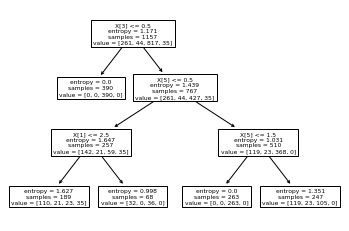

In [74]:
from sklearn import tree
tree.plot_tree(clf_en)

In [80]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7934
Test set score: 0.7531


[Text(0.375, 0.875, 'X[3] <= 0.5\nentropy = 1.171\nsamples = 1157\nvalue = [261, 44, 817, 35]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 390\nvalue = [0, 0, 390, 0]'),
 Text(0.5, 0.625, 'X[5] <= 0.5\nentropy = 1.439\nsamples = 767\nvalue = [261, 44, 427, 35]'),
 Text(0.25, 0.375, 'X[1] <= 2.5\nentropy = 1.647\nsamples = 257\nvalue = [142, 21, 59, 35]'),
 Text(0.125, 0.125, 'entropy = 1.627\nsamples = 189\nvalue = [110, 21, 23, 35]'),
 Text(0.375, 0.125, 'entropy = 0.998\nsamples = 68\nvalue = [32, 0, 36, 0]'),
 Text(0.75, 0.375, 'X[5] <= 1.5\nentropy = 1.031\nsamples = 510\nvalue = [119, 23, 368, 0]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 263\nvalue = [0, 0, 263, 0]'),
 Text(0.875, 0.125, 'entropy = 1.351\nsamples = 247\nvalue = [119, 23, 105, 0]')]

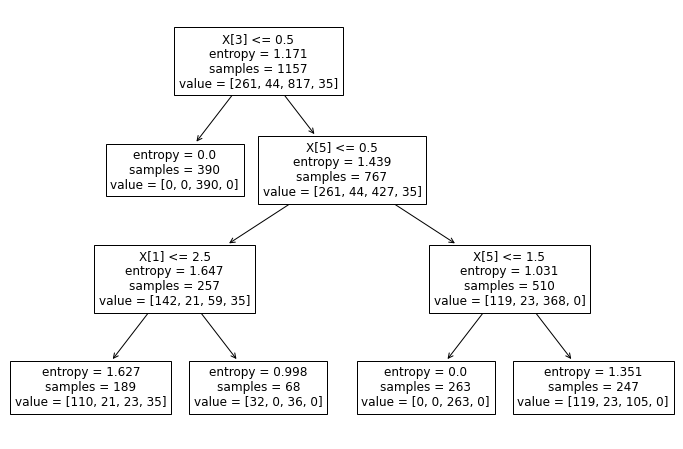

In [81]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [82]:
import matplotlib.pyplot as plt 

[Text(0.375, 0.875, 'X[3] <= 0.5\nentropy = 1.171\nsamples = 1157\nvalue = [261, 44, 817, 35]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 390\nvalue = [0, 0, 390, 0]'),
 Text(0.5, 0.625, 'X[5] <= 0.5\nentropy = 1.439\nsamples = 767\nvalue = [261, 44, 427, 35]'),
 Text(0.25, 0.375, 'X[1] <= 2.5\nentropy = 1.647\nsamples = 257\nvalue = [142, 21, 59, 35]'),
 Text(0.125, 0.125, 'entropy = 1.627\nsamples = 189\nvalue = [110, 21, 23, 35]'),
 Text(0.375, 0.125, 'entropy = 0.998\nsamples = 68\nvalue = [32, 0, 36, 0]'),
 Text(0.75, 0.375, 'X[5] <= 1.5\nentropy = 1.031\nsamples = 510\nvalue = [119, 23, 368, 0]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 263\nvalue = [0, 0, 263, 0]'),
 Text(0.875, 0.125, 'entropy = 1.351\nsamples = 247\nvalue = [119, 23, 105, 0]')]

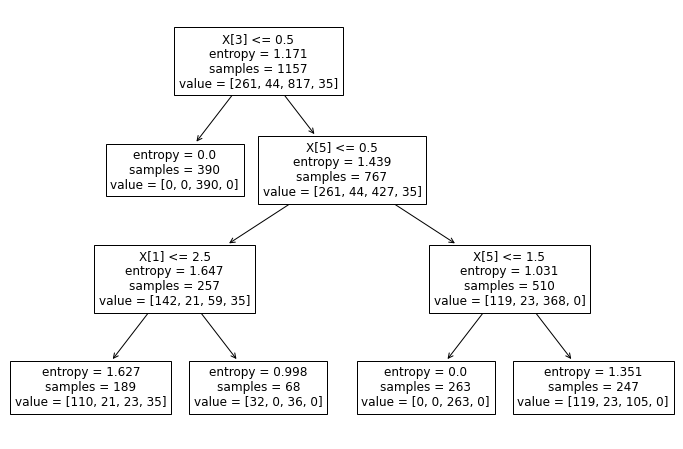

In [83]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [86]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[109   0  14   0]
 [ 25   0   0   0]
 [ 72   0 321   0]
 [ 30   0   0   0]]


In [91]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.89      0.61       123
           1       0.00      0.00      0.00        25
           2       0.96      0.82      0.88       393
           3       0.00      0.00      0.00        30

    accuracy                           0.75       571
   macro avg       0.36      0.43      0.37       571
weighted avg       0.76      0.75      0.74       571



C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [92]:
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.56      0.12      0.20       123
           1       0.00      0.00      0.00        25
           2       0.85      0.80      0.82       393
           3       0.17      1.00      0.29        30

    accuracy                           0.63       571
   macro avg       0.39      0.48      0.33       571
weighted avg       0.71      0.63      0.62       571

[[ 15   0  46  62]
 [  6   0  10   9]
 [  6   0 313  74]
 [  0   0   0  30]]
Gaussian Naive Bayes accuracy is: 62.70%


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo